## Divvy Analysis 2021

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read monthly cyclist data into data frames
jan_2021 = pd.read_csv('H:/R_Data/202101-divvy-tripdata.csv')
feb_2021 = pd.read_csv('H:/R_Data/202102-divvy-tripdata.csv')
mar_2021 = pd.read_csv('H:/R_Data/202103-divvy-tripdata.csv')
apr_2021 = pd.read_csv('H:/R_Data/202104-divvy-tripdata.csv')
may_2021 = pd.read_csv('H:/R_Data/202105-divvy-tripdata.csv')
jun_2021 = pd.read_csv('H:/R_Data/202106-divvy-tripdata.csv')
jul_2021 = pd.read_csv('H:/R_Data/202107-divvy-tripdata.csv')
aug_2021 = pd.read_csv('H:/R_Data/202108-divvy-tripdata.csv')
sep_2021 = pd.read_csv('H:/R_Data/202109-divvy-tripdata.csv')
oct_2021 = pd.read_csv('H:/R_Data/202110-divvy-tripdata.csv')
nov_2021 = pd.read_csv('H:/R_Data/202111-divvy-tripdata.csv')
dec_2021 = pd.read_csv('H:/R_Data/202112-divvy-tripdata.csv')

# Create a list of data frames to compare total row entries with merged data frame.
month_df_list = [jan_2021, feb_2021, mar_2021, apr_2021, may_2021, jun_2021, jul_2021, aug_2021, sep_2021, oct_2021, nov_2021, dec_2021]
total_rows = sum(df.shape[0] for df in month_df_list)
print(total_rows)


5595063


#### Merge Monthly Data

In [2]:
# Merge the data into one large data frame
tripdata_2021 = pd.concat([jan_2021, feb_2021, mar_2021, apr_2021, may_2021, jun_2021, jul_2021, aug_2021, sep_2021, oct_2021, nov_2021, dec_2021], ignore_index=True)

# Get shape of merged data and compare with total_rows to ensure no rows were lost
tripdata_2021.shape

(5595063, 13)

#### Data Standardization & Preparation

In [3]:
# Check data types
print(tripdata_2021.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [4]:
# Convert the started_at and ended_at columns from object to date time data types
tripdata_2021["started_at"] = pd.to_datetime(tripdata_2021["started_at"])
tripdata_2021["ended_at"] = pd.to_datetime(tripdata_2021["ended_at"])

# Insert column for day of the week
tripdata_2021["day_of_week"] = tripdata_2021["started_at"].dt.day_name()

# Insert column for month
tripdata_2021["month"] = tripdata_2021["started_at"].dt.month_name()

# Insert a column for ride duration
tripdata_2021["ride_duration"] = tripdata_2021["ended_at"] - tripdata_2021["started_at"]

# Insert a column for ride duration in minutes (better for analysis later)
tripdata_2021["ride_duration_minutes"] = tripdata_2021["ride_duration"].dt.total_seconds()/60
tripdata_2021["ride_duration_minutes"] = tripdata_2021["ride_duration_minutes"].astype(float)

# Convert month and day_of_week into catagorical type so summaries and graphs are ordered chronologically
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

tripdata_2021["month"] = pd.Categorical(tripdata_2021["month"], categories=month_order, ordered=True)
tripdata_2021["day_of_week"] = pd.Categorical(tripdata_2021["day_of_week"], categories=day_order, ordered=True)

# Check data types after alterations
print(tripdata_2021.dtypes)

ride_id                           object
rideable_type                     object
started_at                datetime64[ns]
ended_at                  datetime64[ns]
start_station_name                object
start_station_id                  object
end_station_name                  object
end_station_id                    object
start_lat                        float64
start_lng                        float64
end_lat                          float64
end_lng                          float64
member_casual                     object
day_of_week                     category
month                           category
ride_duration            timedelta64[ns]
ride_duration_minutes            float64
dtype: object


#### Data Cleaning

In [5]:
# Check for suspicous ride lengths <= 0
susp_rides = (tripdata_2021["ride_duration_minutes"] <= 0).sum()
print("Number of suspicious rides:", susp_rides)

# Create a data frame of all suspicous rides to further investigate
susp_rides_df = tripdata_2021[tripdata_2021["ride_duration_minutes"] <= 0]

# Look into some of the suspicouse rides
susp_rides_df.head()

Number of suspicious rides: 653


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_duration,ride_duration_minutes
6592,FC1EFEF4475D7F56,classic_bike,2021-01-09 15:42:45,2021-01-09 15:41:02,Monticello Ave & Irving Park Rd,KA1504000139,NaN,NaN,41.954005,-87.719128,NaN,NaN,member,Saturday,January,-1 days +23:58:17,-1.716667
35676,6B51296F8E269F2F,classic_bike,2021-01-15 16:40:47,2021-01-15 16:40:47,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,NaN,NaN,41.901315,-87.677409,41.900000,-87.680000,member,Friday,January,0 days 00:00:00,0.000000
35752,B1235D38EB2F8A9E,electric_bike,2021-01-06 18:33:12,2021-01-06 18:31:07,Daley Center Plaza,TA1306000010,NaN,NaN,41.883944,-87.629307,41.880000,-87.630000,member,Wednesday,January,-1 days +23:57:55,-2.083333
60891,3F02776D0D38F96E,classic_bike,2021-01-29 21:02:41,2021-01-29 21:02:41,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872187,-87.661501,41.872187,-87.661501,member,Friday,January,0 days 00:00:00,0.000000
73012,417EE43395E20C71,electric_bike,2021-01-14 17:30:55,2021-01-14 17:30:55,Desplaines St & Kinzie St,TA1306000003,NaN,NaN,41.888612,-87.644438,41.890000,-87.640000,member,Thursday,January,0 days 00:00:00,0.000000


In [6]:
# Check specifically for negative ride durations and 0 ride durations
zero_ride_dur = (tripdata_2021["ride_duration_minutes"] == 0).sum()
negative_ride_dur = (tripdata_2021["ride_duration_minutes"] < 0).sum()
print("Number of rides where ride duration is 0:", zero_ride_dur)
print("Number of rides where ride duration is less than 0:", negative_ride_dur)


Number of rides where ride duration is 0: 506
Number of rides where ride duration is less than 0: 147


In [7]:
# If the negative duration stemmed from data being input into the wrong columns, then this could be corrected. By swapping the started_at and ended_at times for negative ride duration entries.
# filter = tripdata_2021["ride_duration"] < 0
# tripdata_2021.loc[filter, ["start_at", "end_at"]] = tripdata_2021.loc[filter, ["end_at", "start_at"]].values

# Since we do not know the origin of these errors we will remove the suspicous entries for this analysis.

# Updating tripdata_2021 to exclude entries with ride_duration <= 0
tripdata_2021 = tripdata_2021[tripdata_2021["ride_duration_minutes"] > 0]

In [8]:
# Check for N/A entries in ride_duration, started_at and ended_at
NA_duration_count = tripdata_2021[tripdata_2021["ride_duration"].isna()]
print(NA_duration_count)
NA_start_count = tripdata_2021[tripdata_2021["started_at"].isna()]
print(NA_start_count)
NA_end_count = tripdata_2021[tripdata_2021["ended_at"].isna()]
print(NA_end_count)

# All data frames are empty, thus no N/A values in these columns

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, day_of_week, month, ride_duration, ride_duration_minutes]
Index: []
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, day_of_week, month, ride_duration, ride_duration_minutes]
Index: []
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, day_of_week, month, ride_duration, ride_duration_minutes]
Index: []


#### Data Summary

In [9]:
# Summary of tripdata_2021 based on membership status
summary_tripdata2021 = tripdata_2021.groupby("member_casual")["ride_duration_minutes"].describe()
print(summary_tripdata2021)

                   count       mean         std       min       25%  \
member_casual                                                         
casual         2528664.0  32.005780  263.161328  0.016667  9.066667   
member         3065746.0  13.634545   27.706481  0.016667  5.566667   

                     50%        75%           max  
member_casual                                      
casual         15.983333  29.283333  55944.150000  
member          9.600000  16.600000   1559.933333  


In [10]:
# Comparing casual riders and members based on day of the week
dayofweek_rider_summary = tripdata_2021.groupby(["member_casual", "day_of_week"], observed=True).agg(
    number_of_rides=("ride_duration_minutes", "count"),
    mean_ride_duration=("ride_duration_minutes", "mean")
).reset_index()
print(dayofweek_rider_summary)

   member_casual day_of_week  number_of_rides  mean_ride_duration
0         casual      Monday           286340           31.879122
1         casual     Tuesday           274357           27.975488
2         casual   Wednesday           278910           27.661074
3         casual    Thursday           286038           27.705776
4         casual      Friday           364037           30.351768
5         casual    Saturday           557934           34.709966
6         casual      Sunday           481048           37.570956
7         member      Monday           416181           13.248260
8         member     Tuesday           465474           12.789084
9         member   Wednesday           477117           12.820207
10        member    Thursday           451490           12.777033
11        member      Friday           446384           13.326080
12        member    Saturday           433014           15.265522
13        member      Sunday           376086           15.659229


In [11]:
# Compare casual riders and members based on month
month_rider_summary = tripdata_2021.groupby(["member_casual", "month"], observed=True).agg(
    number_of_rides=("ride_duration_minutes", "count"),
    mean_ride_duration=("ride_duration_minutes", "mean")
).reset_index()
print(month_rider_summary)

   member_casual      month  number_of_rides  mean_ride_duration
0         casual    January            18117           25.684590
1         casual   February            10130           49.378103
2         casual      March            84028           38.161002
3         casual      April           136590           38.026052
4         casual        May           256888           38.235133
5         casual       June           370636           37.125947
6         casual       July           442011           32.793512
7         casual     August           412608           28.790781
8         casual  September           363840           27.818819
9         casual    October           257203           28.678317
10        casual   November           106884           23.135478
11        casual   December            69729           23.497323
12        member    January            78711           12.872966
13        member   February            39488           18.023454
14        member      Mar

In [12]:
# Comparing casual riders and members based on bike types
biketype_rider_summary = tripdata_2021.groupby(["member_casual", "rideable_type"]).agg(
    number_of_rides=("ride_duration_minutes", "count"),
    mean_ride_duration=("ride_duration_minutes", "mean")
).reset_index()
print(biketype_rider_summary)

  member_casual  rideable_type  number_of_rides  mean_ride_duration
0        casual   classic_bike          1266527           28.932545
1        casual    docked_bike           312334           81.495986
2        casual  electric_bike           949803           19.829425
3        member   classic_bike          1984219           14.147698
4        member    docked_bike                1            2.633333
5        member  electric_bike          1081526           12.693101


#### Graphical Analysis

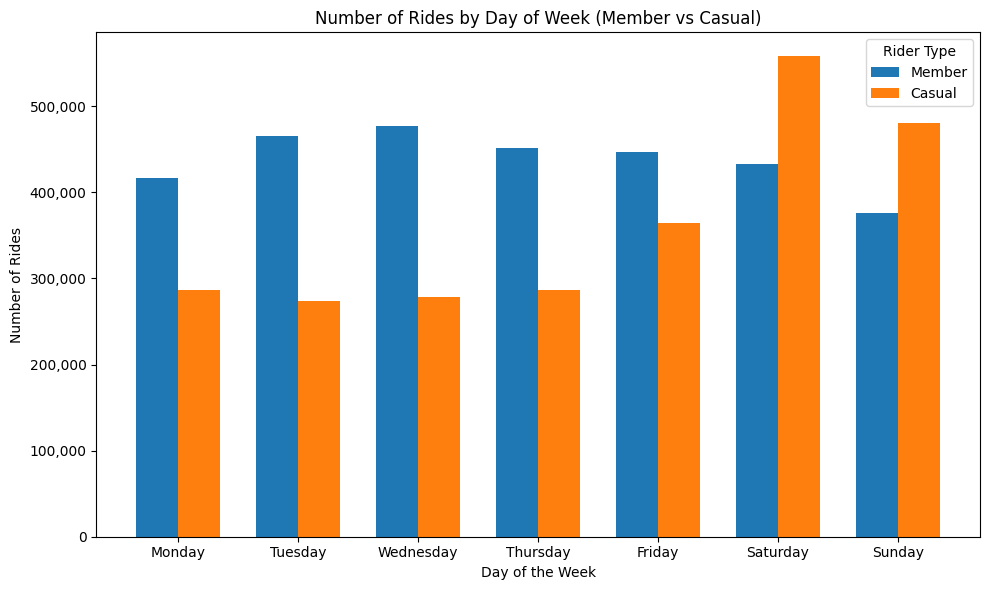

In [13]:
# Plot number of rides based on day of the week

# Pivot data such that day_of_week is the index, columns are member and casual, table is populated with associated number_of_rides
pivot = dayofweek_rider_summary.pivot(
    index="day_of_week",
    columns="member_casual",
    values="number_of_rides"  
)

fig, ax = plt.subplots(figsize=(10,6))

# Arranging bar positions and width
x = np.arange(len(pivot.index))
width = 0.35 

# Align bars side by side with no overlap
ax.bar(x - width/2, pivot["member"], width, label="Member")
ax.bar(x + width/2, pivot["casual"], width, label="Casual")

# Labels and title
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Number of Rides")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index) 
ax.set_title("Number of Rides by Day of Week (Member vs Casual)")
ax.legend(title="Rider Type")

# Format y-axis values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()
 

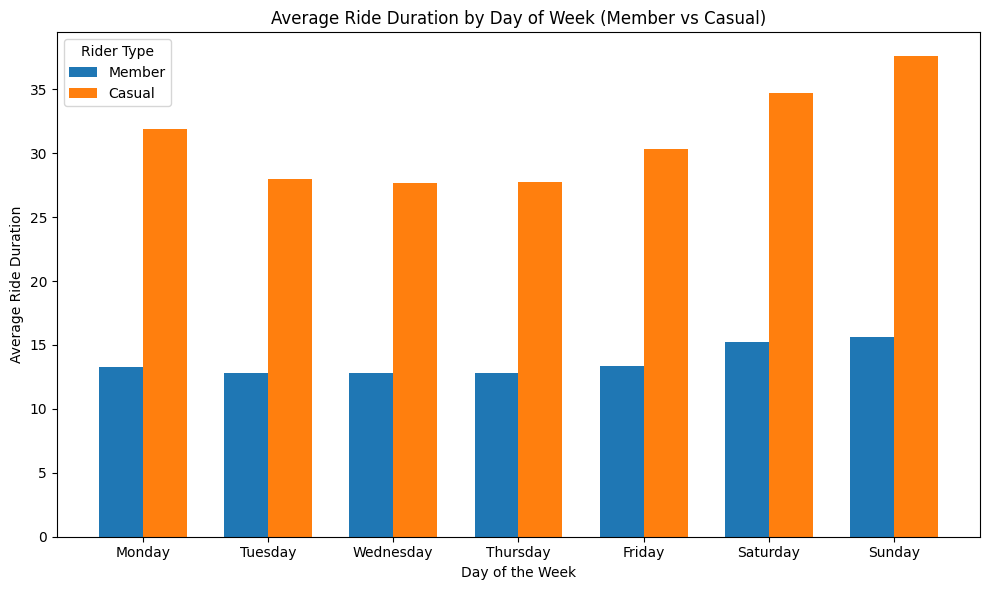

In [14]:
# Plot average ride duration based on day of the week

# Pivot data such that day_of_week is the index, columns are member and casual, table is populated with associated mean_ride_duration
pivot = dayofweek_rider_summary.pivot(
    index="day_of_week",
    columns="member_casual",
    values="mean_ride_duration"
)

fig, ax = plt.subplots(figsize=(10,6))

# Arranging bar positions and width
x = np.arange(len(pivot.index))
width = 0.35 

# Align bars side by side with no overlap
ax.bar(x - width/2, pivot["member"], width, label="Member")
ax.bar(x + width/2, pivot["casual"], width, label="Casual")

# Labels and title
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Average Ride Duration")
ax.set_title("Average Ride Duration by Day of Week (Member vs Casual)")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index)  
ax.legend(title="Rider Type")


plt.tight_layout()
plt.show()

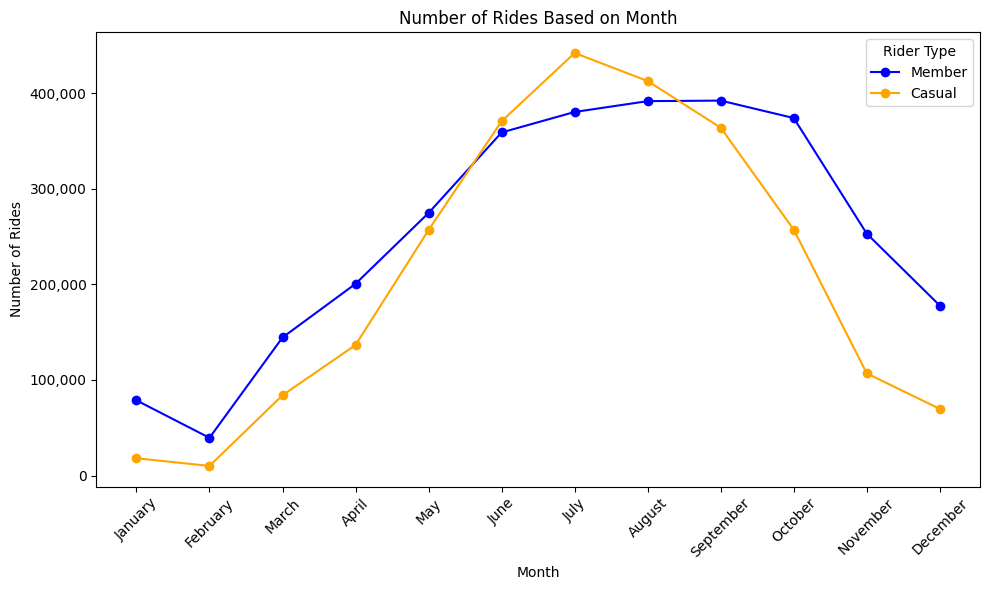

In [15]:
# Plot number of rides based on month

# Pivot data such that month is the index, columns are member and casual, table is populated with associated number_of_rides
pivot = month_rider_summary.pivot(
    index="month",
    columns="member_casual",
    values="number_of_rides"
)

fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(len(pivot.index))

# Plot lines for each member type
ax.plot(pivot.index, pivot["member"], label="Member", linewidth=1.5, color="blue", marker='o')
ax.plot(pivot.index, pivot["casual"], label="Casual", linewidth=1.5, color="orange", marker='o')

# Labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides Based on Month")
ax.legend(title="Rider Type")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45)

# Format y-axis values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

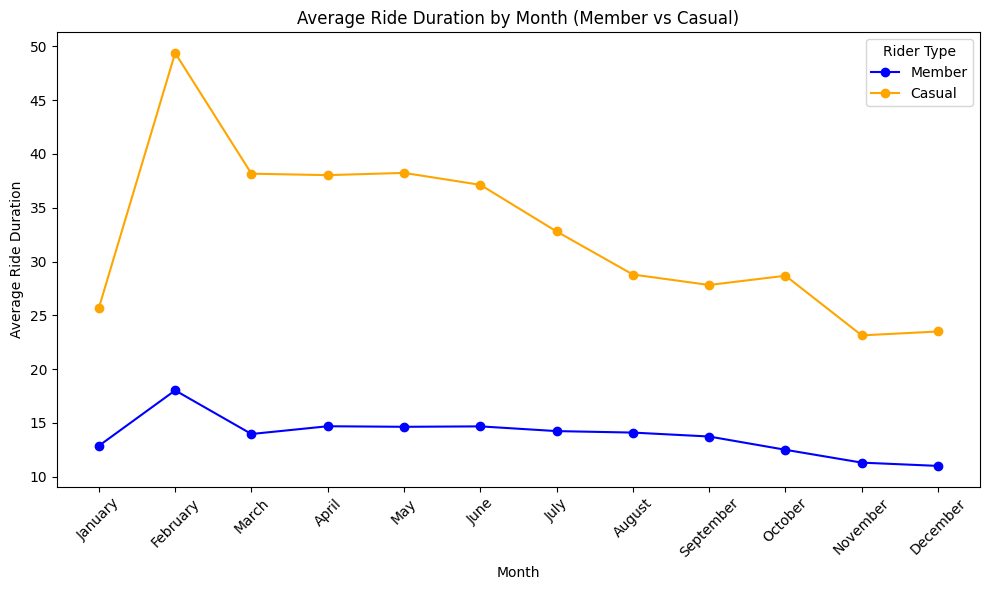

In [16]:
# Plot average ride duration based on month

# Pivot data such that month is the index, columns are member and casual, table is populated with associated mean_ride_duration
pivot = month_rider_summary.pivot(
    index="month",
    columns="member_casual",
    values="mean_ride_duration"  
)

fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(len(pivot.index))

# Plot lines for each member type
ax.plot(pivot.index, pivot["member"], label="Member", linewidth=1.5, color="blue", marker='o')
ax.plot(pivot.index, pivot["casual"], label="Casual", linewidth=1.5, color="orange", marker='o')

# Labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Average Ride Duration")
ax.set_title("Average Ride Duration by Month (Member vs Casual)")
ax.legend(title="Rider Type")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45)

plt.tight_layout()
plt.show()

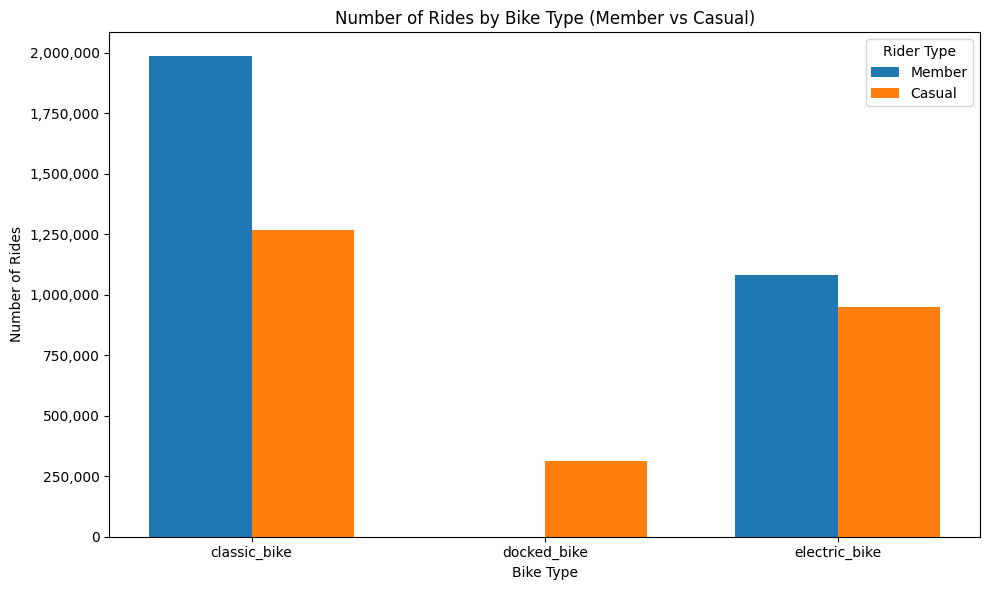

In [17]:
# Plot number of rides based on bike type

# Pivot data such that rideable_type is the index, columns are member and casual, table is populated with associated number_of_rides
pivot = biketype_rider_summary.pivot(
    index="rideable_type",
    columns="member_casual",
    values="number_of_rides"  
)

fig, ax = plt.subplots(figsize=(10,6))

# Arranging bar positions and width
x = np.arange(len(pivot.index))
width = 0.35 

# Align bars side by side with no overlap
ax.bar(x - width/2, pivot["member"], width, label="Member")
ax.bar(x + width/2, pivot["casual"], width, label="Casual")

# Labels and title
ax.set_xlabel("Bike Type")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides by Bike Type (Member vs Casual)")
ax.legend(title="Rider Type")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index)

# Format y-axis values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

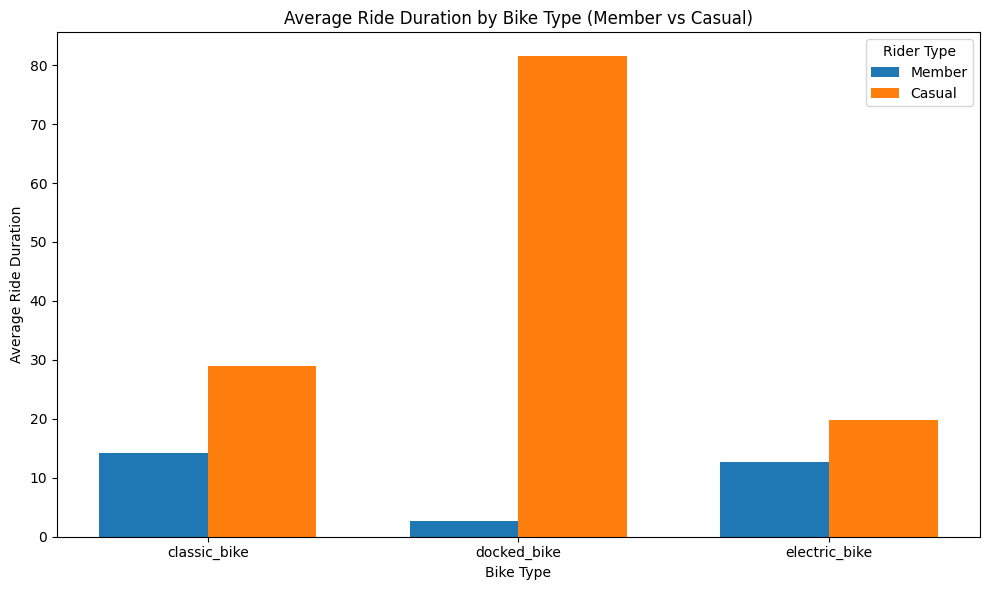

In [18]:
# Plot ride duration based on bike type

# Pivot data such that rideable_type is the index, columns are member and casual, table is populated with associated mean_ride_duration
pivot = biketype_rider_summary.pivot(
    index="rideable_type",
    columns="member_casual",
    values="mean_ride_duration"  
)

fig, ax = plt.subplots(figsize=(10,6))

# Arranging bar positions and width
x = np.arange(len(pivot.index))
width = 0.35 

# Align bars side by side with no overlap
ax.bar(x - width/2, pivot["member"], width, label="Member")
ax.bar(x + width/2, pivot["casual"], width, label="Casual")

# Labels and title
ax.set_xlabel("Bike Type")
ax.set_ylabel("Average Ride Duration")
ax.set_title("Average Ride Duration by Bike Type (Member vs Casual)")
ax.legend(title="Rider Type")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index)

plt.tight_layout()
plt.show()